<a href="https://colab.research.google.com/github/ykitaguchi77/chatGPT/blob/main/Open_Interpreter_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome!

**Open Interpreter** is an open-source project that lets GPT-4 execute Python code locally — or in this case, in Google Colab.

In this demo notebook, we'll explore a few powerful use-cases for Open Interpreter:

1. Writing and editing dozens of documents based on some criteria.
2. Creating "slowed and reverbed" versions of songs with just a YouTube link.
3. Redrawing every frame in a music video with Stable Diffusion.

Now, grab a drink + an `OPENAI_API_KEY` and let's get started!




# Setup

First, let's install `open-interpreter`:

In [ ]:
!pip install open-interpreter
# Google Colab users: restart your runtime here.

You'll need an OpenAI API key to use Open Interpreter. You can [get one here](https://platform.openai.com/account/api-keys).

In [7]:
from google.colab import drive
drive.mount('/content/drive')

with open("/content/drive/MyDrive/Deep_learning/api.txt") as file:
    #text = file.read()
    i=1
    key = []
    while True:
        include_break_line = file.readline() #改行が含まれた行
        line = include_break_line.rstrip() #改行を取り除く
        if line: #keyの読み込み
            #print(f'{i}行目：{line}')
            key.append(line)
            i += 1
        else:
            break

# APIキーの準備
# #ngrok_aceess_token = key[5]
#openai_api_key = key[3]
# deepl_auth_key = key[1]
# serp_api_key = key[7]

import os
os.environ["OPENAI_API_KEY"] = key[3]
os.environ["SERPAPI_API_KEY"] = key[7]
os.environ["GOOGLE_CSE_ID"] = key[9]
os.environ["GOOGLE_API_KEY"] = key[11]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import interpreter

# Paste your OpenAI API key below.
interpreter.api_key = os.environ["OPENAI_API_KEY"]


**By default, Open Interpreter will ask for confirmation before executing any code.**

Since Google Colab is a safe, isolated environment, we recommend enabling `auto_run`. This mimics the behavior of OpenAI's code interpreter.

In [9]:
interpreter.auto_run = True

# Basic Examples

## Hello, World!

Let's start by asking the interpreter to print hello world.

In [ ]:
interpreter.chat("Please print hello world.")

Great! The model decided to run a **code block** then tell us its output.

## Math

For this example, we're going to open an interactive chat in our terminal with `interpreter.chat()`.

💬 **The interactive chat behaves exactly like ChatGPT.** 💬

Try this:

1. Ask Open Interpreter to solve an equation like `10x + 14 = 12`
2. Watch it use a Python library called `sympy` to solve it.
3. Type 'exit' to leave the interactive chat.

In [11]:
interpreter.chat()

Exception in thread Thread-15 (save_and_display_stream):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner


    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/interpreter/code_interpreter.py", line 369, in save_and_display_stream
    raise KeyboardInterrupt
KeyboardInterrupt


## Web Browsing

Let's ask Open Interpreter to browse the web.

1. Start by opening an interactive chat again with `interpreter.chat()`.
2. Type a query like "what are the last 10 BBC news headlines?"

In [ ]:
interpreter.chat()

Here it likely ran two code blocks:

1. The first code block installed `feedparser` from pip.
1. The second used `feedparser` to read the BBC's RSS feed.

Notice that the first code block **was a shell command.** Open Interpreter uses Jupyter internally, so it can run shell commands *and* Python.

## Resetting the Chat

In Python, the Open Interpreter instance remembers your conversation history.

If you want it to forget previous messages, you can reset it:

In [ ]:
interpreter.reset()

Now it won't remember the previous examples.

<br>

`Why might I want to do this?`

<br>

To reduce the number of tokens that get sent to OpenAI.

We need to send OpenAI your entire conversation history (automatically limited to the maximum amount GPT-4 can handle) everytime 1) we send it a message or 2) a code block produces an output.

<br>

**Note:** The command-line version of Open Interpreter resets itself automatically.

# Advanced Examples

## YouTube Link -> Animation

In [ ]:
# Watch the final output:

I've always been fascinated by hand drawn animation. Let's see if we can use Open Interpreter to express that.

We'll ask it to redraw every frame in Steve Lacey's "Bad Habit" video with `replicate`. They have a service that can redraw images in new styles.

<br>

`Doesn't this require logging into "replicate"?`

<br>

Yes, and this is a great reason to use Open Interpreter! We can simply log in to `replicate`, then tell the interpreter how to use it ([I just pasted in replicate's quick start](https://replicate.com/jagilley/controlnet-pose/api)).
Because code is run locally, the interpreter is "logged in" too.

In [ ]:
# First, let's install Replicate and log in.

!pip install replicate
import os
os.environ["REPLICATE_API_TOKEN"] = "api_token" # Get yours: https://replicate.com/account

In [ ]:
# Now we'll ask interpreter to redraw the video using Replicate.

message = """

I want to edit a video so it's in 12 fps and each frame is redrawn with ControlNet
to give it a stop motion / hand-drawn animation feeling.

Here's how you use ControlNet on a single frame, from Replicate's quick start:

import replicate
output = replicate.run(
    "jagilley/controlnet-canny:aff48af9c68d162388d230a2ab003f68d2638d88307bdaf1c2f1ac95079c9613",
    input={"image": open("path/to/file", "rb"), "prompt": "<prompt>"}
)

(I've noticed that this always returns a list of two links. Just use the second one.)

Please download this video and just use the seconds from 0:10 to 0:17:
https://www.youtube.com/watch?v=VF-FGf_ZZiI

Then reduce it to 12fps, and then replace those frames with ControlNet redraws
using random prompts that evoke stop motion / hand-drawn animation--
think embroidery, pencil art, claymation, yarn on a table, etc--
then add the original sound back.

Thanks!

"""

interpreter.reset() # Reset the chat
interpreter.chat(message) # Pass in the message above

<br>

Just for fun, imagine a function that takes a `youtube_url`, passes it into `interpreter.chat(message)` with the instructions above, then returns the processed filename:

```python
def animate_video(youtube_url):
  interpreter.reset()
  interpreter.message(f'Animate {youtube_url} with the following steps then save to final.mp4. ...')
  return 'final.mp4'
```

## Create documents

In [ ]:
interpreter.reset() # Reset the chat
interpreter.chat("""Can you make a folder called documents and put five .docx files in it
and write a sentence about machine learning in each of them?""") # Pass a message directly into chat

## Edit all documents in a folder

In [ ]:
interpreter.reset()
interpreter.chat("""Go through all the .docx files in my 'documents' folder
and replace every occurrence of 'Machine Learning' with 'AI'.""")

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [ ]:
# If you don't run interpreter.reset(), it will remember your conversation.
interpreter.chat("I wanted to replace the files, so please delete the old ones and rename the new ones")

Output()

Output()

Output()

## Slow + Reverb a YouTube Link

In [ ]:
message = "Can you slow + reverb this song? https://www.youtube.com/watch?v=8GW6sLrK40k"

interpreter.reset()
interpreter.chat(message)

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [ ]:
# Listen to the final result:

Now we could open `interpreter.chat()`, ask it to slow it down more, add more reverb, or even create a video with [a .gif backround](https://i.giphy.com/media/zIV7iWK9f0x8Y/giphy.webp).

## Open Interpreter Artwork

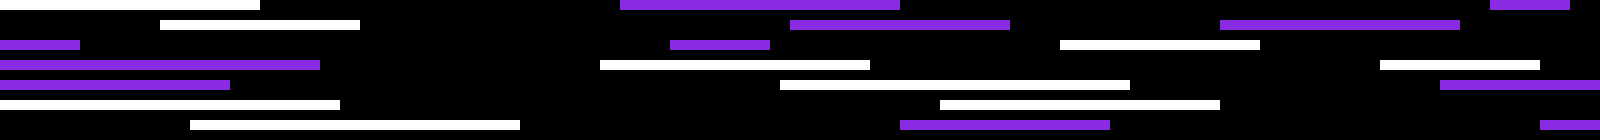

The artwork for Open Interpreter was illustrated by Open Interpreter. How?

It was given a description inspired by [Ruby Chen's](https://rubywjchen.com/) GPT-4 artwork:

In [ ]:
message = """

Hello! I'd like your help making some artwork for the Open Interpreter project.

It's going to be pixel art, ~160 wide and 14 pixels tall. Black background.

I'd like to see rectangles on every other row. These should be anywhere from
~6 to 36 pixels in width. They should be placed randomly around the image, never touching eachother
(the space between them should be ~16-64 pixels). They can go off screen / butt up against the edges.

Half of these rectangles should be white, half should be a powerful purple color: R138 G43 B226

Once you've created it, please scale it up with nearest-neighbor 10x.

Please make ~10 options I can review, like banner_1.png, banner_2.png, etc.

"""

interpreter.reset()
interpreter.chat(message)

## Add subtitles to videos

`replicate` also has a speech-to-text service that generates subtitle files (.srt).

Let's ask Open Interpreter to use some code [copied from replicate's quickstart](https://replicate.com/m1guelpf/whisper-subtitles/api) to add hardcoded subtitles to a video:

In [ ]:
message = """
Hello! I just logged into Replicate on this machine. You have my permission to run any code.

Could you use their speech-to-text service to hardcode subtitles to the bottom of billyking.mp4 and make billy_subbed.mp4?
"""

# Again, let's give Open Interpreter an example of how to use the service.
message += """
Here's some code that Replicate provides for how to use their service:

import replicate
output = replicate.run(
    "m1guelpf/whisper-subtitles:7f686e243a96c7f6f0f481bcef24d688a1369ed3983cea348d1f43b879615766",
    input={"audio_path": open("path/to/file", "rb")} # Can also be a video path
)
print(output)

"""

# Now let's reset and run Open Interpreter.
interpreter.reset()
interpreter.chat(message)

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

You can [watch the output video here.](https://youtube.com/shorts/F6gOzP691po?feature=share)

## YouTube video -> TikTok Clip

In [ ]:
message = """

I'd like your help in making a TikTok clip of this: https://www.youtube.com/watch?v=KgHkAwaW_lk

Please cut the clip from this -- from 0:15 to 0:38 -- and crop it to portrait (exactly 9:16-- this will be tricky)
around the face in the frame. Just follow the face horizontally -- the final video should be as tall as the original.

You'll need to smoothly/softly follow the one face in the frame so please smoothly average out the motion
between confident face detections. Then put the audio back in. Thanks!

"""

interpreter.reset()
interpreter.chat(message)

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

  warnings.warn("Warning: in file %s, "%(self.filename)+



Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Nice! It's saved as `cropped_clip_with_audio.mkv`.

One problem -- if we want to send it to our phone and upload it to TikTok or YT Shorts, we'll need it to be an `.mp4` file.

So, let's just ask for that:

In [ ]:
# The interpreter remembers our conversation unless we explicitly .reset() it.
interpreter.chat("Looks great! Can you convert it to an mp4?")

Output()

Output()

Output()

Amazing. Now we can display the final result in Google Colab, too:

In [ ]:
# Final output:

## Bonus: Image -> Animation

Another `replicate` example -- let's use ControlNet to turn [this image](https://i.ibb.co/f0p4Q5R/i-heart-victoria-paris.png) into 90s-style animated intro.

In [ ]:
message = """
Hi, I want to make a video that's comprised of 12 frames. The 12 frames should be of the image
victoria.png run through controlnet with different materials as prompts.

I'm logged into replicate on this machine. Here's how to use replicate's controlnet:

output = replicate.run(
    "jagilley/controlnet-canny:aff48af9c68d162388d230a2ab003f68d2638d88307bdaf1c2f1ac95079c9613",
    input={"image": open("path/to/file", "rb"), "prompt": "metal"}
)
print(output)

Can you run victoria.png through this 12 times with different materials each time like "metal", "embroidery", and "crayon"?
Then stitch together the 12 pictures into a 1 second video clip. Thank you!
"""

interpreter.reset()
interpreter.chat(message)

Output()

Output()

['metal', 'embroidery', 'crayon']

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

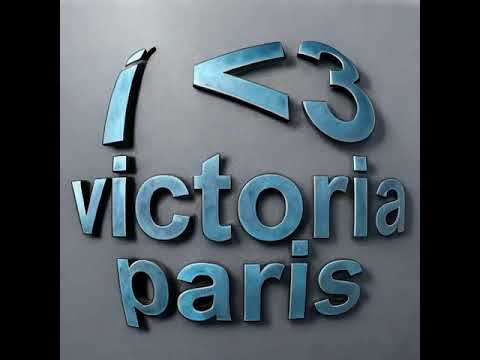

In [ ]:
# Watch the final output: